# Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset 1
In dataset 1, the input features are OHCL prices which have a window of 7 days and horizon of 1.
The input prices have been Normalized within each window. i.e. Normalization has been applied to each window and not the whole dataset in an attempt to capture the patterns irrespective of value of prices.

Normalization formula: (X - X(min))/(X(max) - X(min))

but for min and max values only the window prices are considered and not the horizon prices. The horizon prices are normalized by min and max of window set thus these values can be greater than 1 or lesser than 0.


In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
  inflating: Dataset.npy             
  inflating: Target.csv              


In [ ]:
features_np = np.load('Dataset.npy')
target_df = pd.read_csv('./Target.csv')

target_df = target_df.drop('Unnamed: 0',axis=1)

In [ ]:
features = tf.data.Dataset.from_tensor_slices(features_np)
target = tf.data.Dataset.from_tensor_slices(target_df)
dataset = tf.data.Dataset.zip((features,target))

In [ ]:
# Divide the dataset into train, val and test split
l_dataset = len(dataset)
train_dataset = dataset.take(int(0.8*l_dataset))
val_dataset = dataset.skip(int(0.8*l_dataset)).take(int(0.1*l_dataset))
test_dataset = dataset.skip(int(0.8*l_dataset)).skip(int(0.1*l_dataset))

In [ ]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

2280
285
285


In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for i in train_dataset:
  print(i[0].shape)
  print(i[1].shape)
  break

(32, 4, 7)
(32, 4)


## Model Test run

In [ ]:
inputs = tf.keras.layers.Input(shape=(4,7))
x = tf.keras.layers.Dense(50,activation='relu')(inputs[:,0,:])
outputs = tf.keras.layers.Dense(4,activation='linear')(x)
model = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.compile(loss='mae',
              optimizer='adam')

In [ ]:
for i in train_dataset:
  print(model(i[0]))
  break

tf.Tensor(
[[-0.13887453  0.34459788  0.3408625  -0.24726254]
 [-0.2433003   0.18917538  0.38242897 -0.26215574]
 [-0.28364855  0.14101149  0.17406909 -0.15086818]
 [-0.49227366  0.24361767  0.07354163  0.13756609]
 [-0.513634    0.22960316 -0.07317992  0.4830333 ]
 [-0.20192832  0.10761223 -0.15846373  0.248302  ]
 [-0.29653138  0.17388904  0.14490661 -0.0748595 ]
 [-0.40611765  0.19325152  0.21584949  0.08010318]
 [-0.52108955  0.2034121  -0.03159043  0.4208231 ]
 [-0.3057652   0.3291336  -0.03534171  0.26624826]
 [-0.13650861  0.30458286  0.25618967 -0.10556805]
 [-0.32179213  0.43040696  0.30210286 -0.12940642]
 [-0.28256238  0.37595955  0.29369152 -0.00781116]
 [-0.34188238  0.48048458  0.19272824 -0.00379274]
 [-0.2816855   0.5665623   0.33187422 -0.09472977]
 [-0.26551533  0.38488963  0.34722173 -0.09574606]
 [-0.16498826  0.18394993  0.15539105 -0.11893132]
 [-0.2176066   0.11775607  0.09744988 -0.02263847]
 [-0.32893765  0.20844989  0.08389469  0.0990703 ]
 [-0.53906196  0.313

In [ ]:
del model, inputs, outputs, x

## Model 1: Convolutional Model(Independent Dense)

Model 1 uses Conv1D layers to predict the output values. In Model 1, inputs for OHCL layer each predict their own outputs, i.e. Only Open prices are used to predict the Open prices and [Close, High and Low prices] have no effect on the output of Open price. This is also true for other prices(Close, High and Low) as well.

In [ ]:
def mini_model(inputs,name='',kernel_sizes=[2,3,4]):
  ksize_0, ksize_1, ksize_2 = kernel_sizes
  name_0, name_1, name_2 = name+'_'+str(ksize_0),name+'_'+str(ksize_1),name+'_'+str(ksize_2)
  x_0 = tf.keras.layers.Conv1D(32,kernel_size=ksize_0,name=name_0+'_0',activation='leaky_relu')(inputs)
  x_0 = tf.keras.layers.Conv1D(32,kernel_size=ksize_0,name=name_0+'_1',activation='leaky_relu')(x_0)
  x_0 = tf.keras.layers.BatchNormalization()(x_0)
  x_0 = tf.keras.layers.Conv1D(64,kernel_size=ksize_0,name=name_0+'_2',activation='leaky_relu')(x_0)
  x_0 = tf.keras.layers.Conv1D(64,kernel_size=ksize_0,name=name_0+'_3',activation='leaky_relu')(x_0)
  x_0 = tf.keras.layers.BatchNormalization()(x_0)
  x_0 = tf.keras.layers.Conv1D(128,kernel_size=ksize_0,name=name_0+'_4',activation='leaky_relu')(x_0)
  x_0 = tf.keras.layers.Conv1D(128,kernel_size=ksize_0,name=name_0+'_5',activation='leaky_relu')(x_0)
  x_0 = tf.keras.layers.BatchNormalization()(x_0)

  x_1 = tf.keras.layers.Conv1D(32,kernel_size=ksize_1,name=name_1+'_0',activation='leaky_relu')(inputs)
  x_1 = tf.keras.layers.BatchNormalization()(x_1)
  x_1 = tf.keras.layers.Conv1D(64,kernel_size=ksize_1,name=name_1+'_1',activation='leaky_relu')(x_1)
  x_1 = tf.keras.layers.BatchNormalization()(x_1)
  x_1 = tf.keras.layers.Conv1D(128,kernel_size=ksize_1,name=name_1+'_2',activation='leaky_relu')(x_1)
  x_1 = tf.keras.layers.BatchNormalization()(x_1)

  x_2 = tf.keras.layers.Conv1D(64,kernel_size=ksize_2,name=name_2+'_0',activation='leaky_relu')(inputs)
  x_2 = tf.keras.layers.BatchNormalization()(x_2)
  x_2 = tf.keras.layers.Conv1D(128,kernel_size=ksize_2,name=name_2+'_1',activation='leaky_relu')(x_2)
  x_2 = tf.keras.layers.BatchNormalization()(x_2)

  x_0 = tf.keras.layers.Flatten(name=name_0+'_flatten')(x_0)
  x_1 = tf.keras.layers.Flatten(name=name_1+'flatten')(x_1)
  x_2 = tf.keras.layers.Flatten(name=name_2+'_flatten')(x_2)

  x = tf.keras.layers.Concatenate(name=name+'_concat')([x_0,x_1,x_2])
  x = tf.keras.layers.Dense(192,activation='leaky_relu',name=name+'_dense_0')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(96,activation='leaky_relu',name=name+'_dense_1')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(48,activation='leaky_relu',name=name+'_dense_2')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(24,activation='leaky_relu',name=name+'_dense_3')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  outputs = tf.keras.layers.Dense(1,activation='linear',name=name+'_dense_4')(x)

  return outputs


In [ ]:
# Define Inputs
inputs = tf.keras.layers.Input(shape=(4,7))

# Defining convolutions for each OHCL
open_conv = mini_model(inputs=tf.expand_dims(inputs[:,0,:],axis=-1),name='Open')
high_conv = mini_model(inputs=tf.expand_dims(inputs[:,1,:],axis=-1),name='High')
close_conv = mini_model(inputs=tf.expand_dims(inputs[:,2,:],axis=-1),name='Close')
low_conv = mini_model(inputs=tf.expand_dims(inputs[:,3,:],axis=-1),name='Low')

# Outputs
outputs = tf.keras.layers.Concatenate(name='Output_concat')([open_conv,high_conv,close_conv,low_conv])

# Model
model_1 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model_1.compile(loss='mae',
                optimizer='adam')

In [ ]:
clbk_list = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=1)]

In [ ]:
history_1 = model_1.fit(train_dataset,
          validation_data = val_dataset,
          epochs=100,
          shuffle=False,
          callbacks = clbk_list
          )

Epoch 1/100
72/72 [==============================] - 13s 50ms/step - loss: 0.6058 - val_loss: 0.7007 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 3s 37ms/step - loss: 0.4900 - val_loss: 0.6095 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 3s 41ms/step - loss: 0.4584 - val_loss: 0.5524 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 3s 35ms/step - loss: 0.4431 - val_loss: 0.4970 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 3s 35ms/step - loss: 0.4334 - val_loss: 0.4660 - lr: 0.0010
Epoch 6/100
72/72 [==============================] - 3s 35ms/step - loss: 0.4254 - val_loss: 0.4466 - lr: 0.0010
Epoch 7/100
72/72 [==============================] - 2s 34ms/step - loss: 0.4247 - val_loss: 0.3908 - lr: 0.0010
Epoch 8/100
72/72 [==============================] - 2s 33ms/step - loss: 0.4143 - val_loss: 0.3914 - lr: 0.0010
Epoch 9/100
72/72 [==============================] - 2s 33ms/step - loss: 0.4087 - val_loss: 0.

In [ ]:
model_1.evaluate(test_dataset)

9/9 [==============================] - 0s 9ms/step - loss: 0.3396


0.3396308720111847

In [ ]:
for i in test_dataset:
  print(i[1])
  print(model_1.predict(i[0]))
  break


tf.Tensor(
[[ 0.98138748  1.00176991  1.26420455  1.34229829]
 [ 1.13685474  1.08839779  1.00656455  1.1660693 ]
 [ 1.15647482  1.49309665  1.42579505  1.18518519]
 [ 1.60202361  1.72524407  1.56009913  1.49499285]
 [ 1.22526316  0.95877122  0.87419355  0.97463002]
 [ 0.92504931  1.42683913  1.475       0.89957717]
 [ 1.45610278  1.08103131  0.89534142  1.79510022]
 [ 0.78852459  0.86092715  0.86490683  0.83472328]
 [ 1.12453875  0.96713287  0.95475819  1.08474576]
 [ 1.25176678  1.02542373  0.60038425  0.66724138]
 [ 0.39622642  0.72739541  0.83624161  0.6919692 ]
 [ 0.65292842  0.70310391  0.62550336  0.7359736 ]
 [ 0.45770065 -1.44166667 -0.57932692  0.41034103]
 [-0.38495575 -0.30887372 -0.35893155 -0.55223881]
 [-0.06176784 -0.09517601  0.20638821 -0.109375  ]
 [ 0.18756269 -0.13095238 -0.4987715  -0.2751896 ]
 [-0.45737212 -0.32        0.19636678 -0.22411953]
 [ 0.33009709  0.22148289  0.39619377  0.37925022]
 [ 0.49073257  0.72920696  1.05405405  0.63993025]
 [ 1.10493179  1.076

## Model 2: Convolutional Model(Interconnect Dense)
Model 2 uses Conv1D layers just like the model_1. It uses the same backbone for convolutional layer as the model 1. The difference, however, lies in the Dense(ANN) layers which in this case are interconnected. All the outputs of the convolutional block are concatenated and passed into the Dense(ANN) Network to predict the output of OHCL.

In [ ]:
def mini_model(inputs,name='',kernel_sizes=[2,3,4]):
    ksize_0, ksize_1, ksize_2 = kernel_sizes
    name_0, name_1, name_2 = name+'_'+str(ksize_0),name+'_'+str(ksize_1),name+'_'+str(ksize_2)
    x_0 = tf.keras.layers.Conv1D(32,kernel_size=ksize_0,name=name_0+'_0')(inputs)
    x_0 = tf.keras.layers.Conv1D(32,kernel_size=ksize_0,name=name_0+'_1')(x_0)
    x_0 = tf.keras.layers.BatchNormalization()(x_0)
    x_0 = tf.keras.layers.Conv1D(64,kernel_size=ksize_0,name=name_0+'_2')(x_0)
    x_0 = tf.keras.layers.Conv1D(64,kernel_size=ksize_0,name=name_0+'_3')(x_0)
    x_0 = tf.keras.layers.BatchNormalization()(x_0)
    x_0 = tf.keras.layers.Conv1D(128,kernel_size=ksize_0,name=name_0+'_4')(x_0)
    x_0 = tf.keras.layers.Conv1D(128,kernel_size=ksize_0,name=name_0+'_5')(x_0)
    x_0 = tf.keras.layers.BatchNormalization()(x_0)

    x_1 = tf.keras.layers.Conv1D(32,kernel_size=ksize_1,name=name_1+'_0')(inputs)
    x_1 = tf.keras.layers.BatchNormalization()(x_1)
    x_1 = tf.keras.layers.Conv1D(64,kernel_size=ksize_1,name=name_1+'_1')(x_1)
    x_1 = tf.keras.layers.BatchNormalization()(x_1)
    x_1 = tf.keras.layers.Conv1D(128,kernel_size=ksize_1,name=name_1+'_2')(x_1)
    x_1 = tf.keras.layers.BatchNormalization()(x_1)

    x_2 = tf.keras.layers.Conv1D(64,kernel_size=ksize_2,name=name_2+'_0')(inputs)
    x_2 = tf.keras.layers.BatchNormalization()(x_2)
    x_2 = tf.keras.layers.Conv1D(128,kernel_size=ksize_2,name=name_2+'_1')(x_2)
    x_2 = tf.keras.layers.BatchNormalization()(x_2)

    x_0 = tf.keras.layers.Flatten(name=name_0+'_flatten')(x_0)
    x_1 = tf.keras.layers.Flatten(name=name_1+'flatten')(x_1)
    x_2 = tf.keras.layers.Flatten(name=name_2+'_flatten')(x_2)

    x = tf.keras.layers.Concatenate()([x_0,x_1,x_2])

    return x




In [ ]:
# Inputs
inputs = tf.keras.layers.Input(shape=(4,7))

# OHCL conv layers
open_conv = mini_model(inputs=tf.expand_dims(inputs[:,0,:],axis=-1),name='Open')
high_conv = mini_model(inputs=tf.expand_dims(inputs[:,1,:],axis=-1),name='High')
close_conv = mini_model(inputs=tf.expand_dims(inputs[:,2,:],axis=-1),name='Close')
low_conv = mini_model(inputs=tf.expand_dims(inputs[:,3,:],axis=-1),name='Low')

# Concatenated Dense layers
x = tf.keras.layers.Concatenate()([open_conv,high_conv,close_conv,low_conv])
x = tf.keras.layers.Dense(768,activation='leaky_relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(384,activation='leaky_relu')(x)
x = tf.keras.layers.Dense(192,activation='leaky_relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(96,activation='leaky_relu')(x)
x = tf.keras.layers.Dense(48,activation='leaky_relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(24,activation='leaky_relu')(x)
x = tf.keras.layers.Dense(12,activation='leaky_relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4,activation='linear')(x)


model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model_2.compile(loss ='mae',
                optimizer = 'adam')

In [ ]:
# Define clbk list from model_1 experiments

In [ ]:
history_2 = model_2.fit(train_dataset,
                        validation_data = val_dataset,
                        epochs=100,
                        callbacks=clbk_list)

Epoch 1/100
72/72 [==============================] - 13s 46ms/step - loss: 0.5186 - val_loss: 0.6790 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 2s 31ms/step - loss: 0.4428 - val_loss: 0.6432 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 2s 31ms/step - loss: 0.4172 - val_loss: 0.5906 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 2s 32ms/step - loss: 0.4072 - val_loss: 0.5508 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 2s 31ms/step - loss: 0.4011 - val_loss: 0.4617 - lr: 0.0010
Epoch 6/100
72/72 [==============================] - 2s 31ms/step - loss: 0.4024 - val_loss: 0.4257 - lr: 0.0010
Epoch 7/100
72/72 [==============================] - 2s 31ms/step - loss: 0.3958 - val_loss: 0.3835 - lr: 0.0010
Epoch 8/100
72/72 [==============================] - 2s 31ms/step - loss: 0.3846 - val_loss: 0.3215 - lr: 0.0010
Epoch 9/100
72/72 [==============================] - 2s 30ms/step - loss: 0.3831 - val_loss: 0.

In [ ]:
model_2.evaluate(test_dataset)

9/9 [==============================] - 0s 9ms/step - loss: 0.2930


0.2929717004299164

In [ ]:
for i in test_dataset:
  print(i[1])
  print(model_2(i[0]))
  break

tf.Tensor(
[[ 0.98138748  1.00176991  1.26420455  1.34229829]
 [ 1.13685474  1.08839779  1.00656455  1.1660693 ]
 [ 1.15647482  1.49309665  1.42579505  1.18518519]
 [ 1.60202361  1.72524407  1.56009913  1.49499285]
 [ 1.22526316  0.95877122  0.87419355  0.97463002]
 [ 0.92504931  1.42683913  1.475       0.89957717]
 [ 1.45610278  1.08103131  0.89534142  1.79510022]
 [ 0.78852459  0.86092715  0.86490683  0.83472328]
 [ 1.12453875  0.96713287  0.95475819  1.08474576]
 [ 1.25176678  1.02542373  0.60038425  0.66724138]
 [ 0.39622642  0.72739541  0.83624161  0.6919692 ]
 [ 0.65292842  0.70310391  0.62550336  0.7359736 ]
 [ 0.45770065 -1.44166667 -0.57932692  0.41034103]
 [-0.38495575 -0.30887372 -0.35893155 -0.55223881]
 [-0.06176784 -0.09517601  0.20638821 -0.109375  ]
 [ 0.18756269 -0.13095238 -0.4987715  -0.2751896 ]
 [-0.45737212 -0.32        0.19636678 -0.22411953]
 [ 0.33009709  0.22148289  0.39619377  0.37925022]
 [ 0.49073257  0.72920696  1.05405405  0.63993025]
 [ 1.10493179  1.076

## Model 3: Interconnected Convolution
Model 3 is a 2D Conv2D layer that will take in OHCL layers as a whole and try to figure out the patterns for itself to predict the OHCL price.

In [ ]:
ac = 'leaky_relu'

In [ ]:
inputs = tf.keras.layers.Input(shape=(4,7))
inp = tf.keras.layers.Reshape((4,7,1),input_shape=(4,7))(inputs)
x_0 = tf.keras.layers.Conv2D(filters=64,kernel_size=(4,2),activation=ac)(inp)
x_0 = tf.keras.layers.Conv1D(filters=64,kernel_size=2,activation=ac)(x_0)
x_0 = tf.keras.layers.Conv1D(filters=128,kernel_size=2,activation=ac)(x_0)
x_0 = tf.keras.layers.Conv1D(filters=128,kernel_size=2,activation=ac)(x_0)
x_0 = tf.keras.layers.Conv1D(filters=256,kernel_size=2,activation=ac)(x_0)
x_0 = tf.keras.layers.Conv1D(filters=256,kernel_size=2,activation=ac)(x_0)
x_0 = tf.keras.layers.Flatten()(x_0)

x_1 = tf.keras.layers.Conv2D(filters=64,kernel_size=(4,3),activation=ac)(inp)
x_1 = tf.keras.layers.Conv1D(filters=128,kernel_size=3,activation=ac)(x_1)
x_1 = tf.keras.layers.Conv1D(filters=256,kernel_size=3,activation=ac)(x_1)
# x_1 = tf.keras.layers.Conv1D(filters=256,kernel_size=3,activation='leaky_relu')(x_1)
x_1 = tf.keras.layers.Flatten()(x_1)

x_2 = tf.keras.layers.Conv2D(filters=64,kernel_size=(4,4),activation=ac)(inp)
x_2 = tf.keras.layers.Conv1D(filters=256,kernel_size=4,activation=ac)(x_2)
x_2 = tf.keras.layers.Flatten()(x_2)

x = tf.keras.layers.Concatenate()([x_0,x_1,x_2])
x = tf.keras.layers.Dense(1536,activation=ac)(x)
x = tf.keras.layers.Dense(1536,activation=ac)(x)
x = tf.keras.layers.Dense(768,activation=ac)(x)
x = tf.keras.layers.Dense(500,activation=ac)(x)
x = tf.keras.layers.Dense(100,activation=ac)(x)
x = tf.keras.layers.Dense(20,activation=ac)(x)
outputs = tf.keras.layers.Dense(4,activation='linear')(x)


model_3 = tf.keras.Model(inputs=inputs,outputs=outputs)


In [ ]:
model_3.compile(loss='mae',
                optimizer='adam')

In [ ]:
# Define callback list from model_1 experiments.

In [ ]:
history_3 = model_3.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=100,
                        callbacks=clbk_list)

Epoch 1/100
72/72 [==============================] - 4s 17ms/step - loss: 0.3968 - val_loss: 0.2963 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 1s 8ms/step - loss: 0.3306 - val_loss: 0.2889 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 1s 7ms/step - loss: 0.3239 - val_loss: 0.2882 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 1s 8ms/step - loss: 0.3235 - val_loss: 0.2879 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 1s 7ms/step - loss: 0.3218 - val_loss: 0.2873 - lr: 0.0010
Epoch 6/100
72/72 [==============================] - 1s 7ms/step - loss: 0.3134 - val_loss: 0.2902 - lr: 0.0010
Epoch 7/100
72/72 [==============================] - 1s 7ms/step - loss: 0.3092 - val_loss: 0.2900 - lr: 0.0010
Epoch 8/100
72/72 [==============================] - 1s 7ms/step - loss: 0.3093 - val_loss: 0.2933 - lr: 0.0010
Epoch 9/100
72/72 [==============================] - 1s 7ms/step - loss: 0.3067 - val_loss: 0.2858 - lr

In [ ]:
model_3.evaluate(test_dataset)

9/9 [==============================] - 0s 4ms/step - loss: 0.2914


0.29139330983161926

In [ ]:
for i in test_dataset:
  print(i[1])
  print(model_3(i[0]))
  break

tf.Tensor(
[[ 0.98138748  1.00176991  1.26420455  1.34229829]
 [ 1.13685474  1.08839779  1.00656455  1.1660693 ]
 [ 1.15647482  1.49309665  1.42579505  1.18518519]
 [ 1.60202361  1.72524407  1.56009913  1.49499285]
 [ 1.22526316  0.95877122  0.87419355  0.97463002]
 [ 0.92504931  1.42683913  1.475       0.89957717]
 [ 1.45610278  1.08103131  0.89534142  1.79510022]
 [ 0.78852459  0.86092715  0.86490683  0.83472328]
 [ 1.12453875  0.96713287  0.95475819  1.08474576]
 [ 1.25176678  1.02542373  0.60038425  0.66724138]
 [ 0.39622642  0.72739541  0.83624161  0.6919692 ]
 [ 0.65292842  0.70310391  0.62550336  0.7359736 ]
 [ 0.45770065 -1.44166667 -0.57932692  0.41034103]
 [-0.38495575 -0.30887372 -0.35893155 -0.55223881]
 [-0.06176784 -0.09517601  0.20638821 -0.109375  ]
 [ 0.18756269 -0.13095238 -0.4987715  -0.2751896 ]
 [-0.45737212 -0.32        0.19636678 -0.22411953]
 [ 0.33009709  0.22148289  0.39619377  0.37925022]
 [ 0.49073257  0.72920696  1.05405405  0.63993025]
 [ 1.10493179  1.076

## Model 4: LSTM model (independent)

In [ ]:
inputs = tf.keras.layers.Input(shape=(4,7))
inps = tf.keras.layers.Reshape(target_shape=(4,1,7),input_shape=(4,7))(inputs)

o = tf.keras.layers.LSTM(128,return_sequences=True,activation='relu')(inps[:,0,:,:])
o = tf.keras.layers.LSTM(64,return_sequences=True,activation='relu')(o)
o = tf.keras.layers.LSTM(16,return_sequences=True,activation='relu')(o)
o = tf.keras.layers.LSTM(4,return_sequences=True,activation='relu')(o)
o = tf.keras.layers.LSTM(1,return_sequences=True,activation='linear')(o)

h = tf.keras.layers.LSTM(128,return_sequences=True,activation='relu')(inps[:,1,:,:])
h = tf.keras.layers.LSTM(64,return_sequences=True,activation='relu')(h)
h = tf.keras.layers.LSTM(16,return_sequences=True,activation='relu')(h)
h = tf.keras.layers.LSTM(4,return_sequences=True,activation='relu')(h)
h = tf.keras.layers.LSTM(1,return_sequences=True,activation='linear')(h)

c = tf.keras.layers.LSTM(128,return_sequences=True,activation='relu')(inps[:,2,:,:])
c = tf.keras.layers.LSTM(64,return_sequences=True,activation='relu')(c)
c = tf.keras.layers.LSTM(16,return_sequences=True,activation='relu')(c)
c = tf.keras.layers.LSTM(4,return_sequences=True,activation='relu')(c)
c = tf.keras.layers.LSTM(1,return_sequences=True,activation='linear')(c)

l = tf.keras.layers.LSTM(128,return_sequences=True,activation='relu')(inps[:,3,:,:])
l = tf.keras.layers.LSTM(64,return_sequences=True,activation='relu')(l)
l = tf.keras.layers.LSTM(16,return_sequences=True,activation='relu')(l)
l = tf.keras.layers.LSTM(4,return_sequences=True,activation='relu')(l)
l = tf.keras.layers.LSTM(1,return_sequences=True,activation='linear')(l)

x = tf.keras.layers.Concatenate()([o,h,c,l])
outputs = tf.keras.layers.Flatten()(x)

model_4 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model_4.compile(loss='mae',
              optimizer='adam')

In [ ]:
history_4 = model_4.fit(train_dataset,
                      validation_data=val_dataset,
                      epochs=100,
                      callbacks=clbk_list)

Epoch 1/100
72/72 [==============================] - 25s 88ms/step - loss: 0.6856 - val_loss: 0.7575 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 4s 56ms/step - loss: 0.5500 - val_loss: 0.5129 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 4s 56ms/step - loss: 0.4469 - val_loss: 0.4129 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 4s 57ms/step - loss: 0.3950 - val_loss: 0.3637 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 4s 55ms/step - loss: 0.3614 - val_loss: 0.3370 - lr: 0.0010
Epoch 6/100
72/72 [==============================] - 4s 55ms/step - loss: 0.3532 - val_loss: 0.3332 - lr: 0.0010
Epoch 7/100
72/72 [==============================] - 4s 57ms/step - loss: 0.3517 - val_loss: 0.3327 - lr: 0.0010
Epoch 8/100
72/72 [==============================] - 4s 55ms/step - loss: 0.3508 - val_loss: 0.3327 - lr: 0.0010
Epoch 9/100
72/72 [==============================] - 4s 56ms/step - loss: 0.3500 - val_loss: 0.

## Model 5: LSTM Model (interconnected)

In [ ]:
ac = 'relu'

In [ ]:
inputs = tf.keras.layers.Input(shape=(4,7))

x = tf.keras.layers.LSTM(256,return_sequences=True,activation=ac)(inputs)
x = tf.keras.layers.LSTM(128,return_sequences=True,activation=ac)(x)
x = tf.keras.layers.LSTM(64,return_sequences=True,activation=ac)(x)
x = tf.keras.layers.LSTM(32,return_sequences=True,activation=ac)(x)
x = tf.keras.layers.LSTM(16,return_sequences=True,activation=ac)(x)
x = tf.keras.layers.LSTM(8,return_sequences=True,activation=ac)(x)
x = tf.keras.layers.LSTM(4,return_sequences=True,activation=ac)(x)
x = tf.keras.layers.LSTM(1,return_sequences=True,activation='linear')(x)

outputs = tf.keras.layers.Reshape(target_shape=(4,),input_shape=(4,1))(x)

model_5 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model_5.compile(loss='mae',
                optimizer='adam')

In [ ]:
history_5 = model_5.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=100,
                        callbacks=clbk_list)

Epoch 1/100
72/72 [==============================] - 14s 94ms/step - loss: 0.6683 - val_loss: 0.6814 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 6s 78ms/step - loss: 0.5687 - val_loss: 0.5707 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 6s 81ms/step - loss: 0.5546 - val_loss: 0.5625 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 6s 80ms/step - loss: 0.5170 - val_loss: 0.5308 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 6s 78ms/step - loss: 0.4692 - val_loss: 0.4463 - lr: 0.0010
Epoch 6/100
72/72 [==============================] - 5s 76ms/step - loss: 0.4218 - val_loss: 0.3468 - lr: 0.0010
Epoch 7/100
72/72 [==============================] - 5s 74ms/step - loss: 0.3748 - val_loss: 0.3420 - lr: 0.0010
Epoch 8/100
72/72 [==============================] - 6s 78ms/step - loss: 0.3634 - val_loss: 0.3362 - lr: 0.0010
Epoch 9/100
72/72 [==============================] - 6s 79ms/step - loss: 0.3589 - val_loss: 0.

## Model 6: ConvLSTM model

In [ ]:
ac = 'relu'

In [ ]:
inputs = tf.keras.layers.Input(shape=(4,7))
inps = tf.keras.layers.Reshape(target_shape=(1,4,7),input_shape=(4,7))(inputs)

x = tf.keras.layers.ConvLSTM1D(filters=128,kernel_size=2,data_format='channels_first',return_sequences=True,activation=ac)(inps)
x = tf.keras.layers.ConvLSTM1D(filters=128,kernel_size=2,data_format='channels_first',return_sequences=True,dropout=0.2,recurrent_dropout=0.2,activation=ac)(x)
x = tf.keras.layers.ConvLSTM1D(filters=256,kernel_size=2,data_format='channels_first',return_sequences=True,dropout=0.2,recurrent_dropout=0.2,activation=ac)(x)
x = tf.keras.layers.ConvLSTM1D(filters=256,kernel_size=2,data_format='channels_first',return_sequences=True,dropout=0.2,recurrent_dropout=0.2,activation=ac)(x)
x = tf.keras.layers.ConvLSTM1D(filters=512,kernel_size=2,data_format='channels_first',return_sequences=True,dropout=0.2,recurrent_dropout=0.2,activation=ac)(x)
x = tf.keras.layers.ConvLSTM1D(filters=512,kernel_size=2,data_format='channels_first',return_sequences=False,activation=ac)(x)
x = tf.keras.layers.Flatten()(x)

x_1 = tf.keras.layers.ConvLSTM1D(filters=128,kernel_size=3,data_format='channels_first',return_sequences=True,activation=ac)(inps)
x_1 = tf.keras.layers.ConvLSTM1D(filters=256,kernel_size=3,data_format='channels_first',return_sequences=True,activation=ac)(x_1)
x_1 = tf.keras.layers.ConvLSTM1D(filters=512,kernel_size=3,data_format='channels_first',return_sequences=True,activation=ac)(x_1)
x_1 = tf.keras.layers.Flatten()(x_1)

x_2 = tf.keras.layers.ConvLSTM1D(filters=256,kernel_size=4,data_fromat='channels_first',return_sequences=True,activation=ac)(inps)
x_2 = tf.keras.layers.ConvLSTM1D(filters=512,kernel_size=4,data_format='channels_first',return_sequences=True,activation=ac)(x_2)
x_2 = tf.keras.layers.Flatten()(x_2)

a = tf.keras.layers.Concatenate()([x,x_1,x_2])
a = tf.keras.layers.Dense(750,activation=ac)(a)
a = tf.keras.layers.Dense(350,activation=ac)(a)
a = tf.keras.layers.Dense(100,activation=ac)(a)

outputs = tf.keras.layers.Dense(4,activation='linear')(a)

model_6 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model_6.compile(loss='mae',
                optimizer='adam')

In [ ]:
# Define clbk_list here which is defined previously in model_1 experiment
clbk_list

In [ ]:
history_6 = model_6.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=100,
                        callbacks=clbk_list)

Epoch 1/100
72/72 [==============================] - 30s 119ms/step - loss: 0.6628 - val_loss: 0.6584 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 5s 76ms/step - loss: 0.5325 - val_loss: 0.4711 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 6s 78ms/step - loss: 0.4338 - val_loss: 0.3293 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 6s 77ms/step - loss: 0.3861 - val_loss: 0.3046 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 5s 75ms/step - loss: 0.3674 - val_loss: 0.3071 - lr: 0.0010
Epoch 6/100
72/72 [==============================] - 6s 78ms/step - loss: 0.3530 - val_loss: 0.2963 - lr: 0.0010
Epoch 7/100
72/72 [==============================] - 6s 79ms/step - loss: 0.3400 - val_loss: 0.2983 - lr: 0.0010
Epoch 8/100
72/72 [==============================] - 6s 79ms/step - loss: 0.3339 - val_loss: 0.2882 - lr: 0.0010
Epoch 9/100
72/72 [==============================] - 5s 74ms/step - loss: 0.3273 - val_loss: 0

KeyboardInterrupt: ignored

In [ ]:
model_6.evaluate(test_dataset)

9/9 [==============================] - 0s 10ms/step - loss: 0.2913


0.2912816107273102

# Dataset 2
In dataset 2, the adjusted close values of the Infosys stock are taken.


In [ ]:
!python -m pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
infy_prices = yf.download('INFY.NS',start='2011-01-01',end=pd.Timestamp.today())
infy_close = infy_prices['Close']

log_infy = np.log(infy_close)

# Returns
rp = 5
infy_returns = pd.concat([log_infy.diff(i) for i in [rp,rp*3,rp*6,rp*12]],axis=1)
infy_returns.columns = ['5DRT','15DRT','30DRT','60DRT']
infy_returns = infy_returns.dropna()

# Price data
t_s = pd.concat([log_infy.diff(1).shift(i) for i in range(6,-1,-1)],axis=1)
t_s.columns = ['t-6','t-5','t-4','t-3','t-2','t-1','t0']
t_s = t_s.dropna()

l_infy = log_infy.copy()
l_infy = l_infy.dropna()
l_infy = pd.DataFrame(l_infy)

# Define Origin
t_s.columns = pd.MultiIndex.from_arrays([np.repeat('Series',len(t_s.columns)),t_s.columns])
infy_returns.columns = pd.MultiIndex.from_arrays([np.repeat('Returns',len(infy_returns.columns)),infy_returns.columns])
l_infy.columns = pd.MultiIndex.from_tuples([('Origin','Log(t0')])

# Define the target price of the next day
Y = log_infy.diff(1).shift(-1)

# Feeding in the current day time data
timestamp_ = pd.DataFrame(Y.index.map(pd.Timestamp.timestamp))
day = 24*60*60
week = 7*day
year = 365*day
dateframe = pd.DataFrame({('Time','WeekSin'): [],('Time','WeekCos'): [],('Time','YearSin'): [],('Time','YearCos',): []},)
dateframe[('Time','WeekSin')] = timestamp_.Date.map(lambda x: np.sin(x * 2*np.pi/week))
dateframe[('Time','WeekCos')] = timestamp_.Date.map(lambda x: np.cos(x * 2*np.pi/week))
dateframe[('Time','YearSin')] = timestamp_.Date.map(lambda x: np.sin(x * 2*np.pi/year))
dateframe[('Time','YearCos')] = timestamp_.Date.map(lambda x: np.cos(x * 2*np.pi/year))
dateframe.index = Y.index
dateframe = dateframe.shift(-1).dropna()

y_cols = pd.MultiIndex.from_tuples([('Y_pred','t+1')])
Y = pd.DataFrame(Y)
Y.columns = y_cols


# Defining the Technical indicators


dataset = pd.concat([t_s,infy_returns,l_infy,dateframe,Y],axis=1).dropna()


[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset.head()

Series                                                    \
                 t-6       t-5       t-4       t-3       t-2       t-1   
Date                                                                     
2011-03-30  0.007075  0.016947  0.003152  0.051992 -0.007457  0.010708   
2011-03-31  0.016947  0.003152  0.051992 -0.007457  0.010708 -0.000772   
2011-04-01  0.003152  0.051992 -0.007457  0.010708 -0.000772  0.021959   
2011-04-04  0.051992 -0.007457  0.010708 -0.000772  0.021959 -0.007168   
2011-04-05 -0.007457  0.010708 -0.000772  0.021959 -0.007168  0.019997   

                       Returns                                  Origin  \
                  t0      5DRT     15DRT     30DRT     60DRT    Log(t0   
Date                                                                     
2011-03-30 -0.000772  0.057622  0.024066  0.020503 -0.086776  5.982329   
2011-03-31  0.021959  0.076429  0.047723  0.043605 -0.071474  6.004288   
2011-04-01 -0.007168  0.017270  0.052387  0.033107 -0.072346  5.997120   
2011-04-04  0.019997  0.044724  0.057143  0.057304 -0.057697  6.017117   
2011-04-05  0.000030  0.034046  0.080222  0.036602 -0.026301  6.017148   

                    Time                                  Y_pred  
                 WeekSin   WeekCos   YearSin   YearCos       t+1  
Date                                                              
2011-03-30 -7.818315e-01  0.623490  0.993257 -0.115935  0.021959  
2011-03-31 -9.249919e-13  1.000000  0.991114 -0.133015 -0.007168  
2011-04-01  7.818315e-01  0.623490  0.988678 -0.150055  0.019997  
2011-04-04 -4.338837e-01 -0.900969  0.979614 -0.200891  0.000030  
2011-04-05 -9.749279e-01 -0.222521  0.976011 -0.217723 -0.002470

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

data = pd.DataFrame(scaler.fit_transform(dataset[['Series','Returns','Y_pred']]),columns=dataset[['Series','Returns','Y_pred']].columns,index=dataset[['Series','Returns','Y_pred']].index)
dataset['Series'] = data['Series']
dataset['Returns'] = data['Returns']
dataset['Y_pred'] = data['Y_pred']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
log_infy.head()

Date
2011-01-03    6.069105
2011-01-04    6.075763
2011-01-05    6.069467
2011-01-06    6.074814
2011-01-07    6.043449
Name: Close, dtype: float64

In [ ]:
scaler_stock = [scaler.data_max_[:7],scaler.data_min_[:7]]
scaler_returns = [scaler.data_max_[7:11],scaler.data_min_[7:11]]
scaler_y = [scaler.data_max_[11],scaler.data_min_[11]]

In [ ]:
Y = dataset.pop('Y_pred')
X = dataset

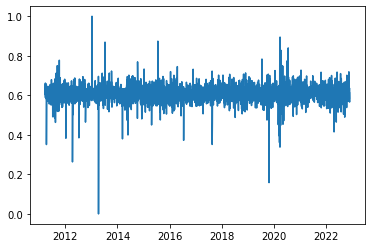

In [ ]:
plt.plot(X[('Series','t0')])
plt.show()

In [ ]:
train_len = int(0.8*len(Y))

y_train, y_test = Y[:train_len],Y[train_len:]
x_train, x_test = X[:train_len],X[train_len:]

In [ ]:
x_train_tfd = tf.data.Dataset.from_tensor_slices({'Series': x_train['Series'].to_numpy(),
                                             'Returns': x_train['Returns'].to_numpy(),
                                             'Origin': x_train['Origin'].to_numpy(),
                                             'Time': x_train['Time'].to_numpy()})
y_train_tfd = tf.data.Dataset.from_tensor_slices(y_train)

train_dataset = tf.data.Dataset.zip((x_train_tfd,y_train_tfd))

x_test_tfd = tf.data.Dataset.from_tensor_slices({'Series': x_test['Series'].to_numpy(),
                                                 'Returns': x_test['Returns'].to_numpy(),
                                                 'Origin': x_test['Origin'].to_numpy(),
                                                 'Time': x_test['Time'].to_numpy()})
y_test_tfd = tf.data.Dataset.from_tensor_slices(y_test)

test_dataset = tf.data.Dataset.zip((x_test_tfd,y_test_tfd))

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Helper Function
def get_act(model,dataset,scaler_y):
  y_trues = []
  y_preds = []
  for i in dataset:
    x,y = i
    # y = tf.cast(y,tf.float32)
    y = y*(scaler_y[0] - scaler_y[1]) + scaler_y[1]

    y_pred = model(x,training=False)
    y_pred = y_pred*(scaler_y[0] - scaler_y[1]) + scaler_y[1]

    y_true = x['Origin'] + y
    y_pred = x['Origin'] + tf.cast(y_pred,tf.float64)

    y_trues.append(y_true)
    y_preds.append(y_pred)

  a = tf.concat(values=y_trues,axis=0).numpy().flatten()
  b = tf.concat(values=y_preds,axis=0).numpy().flatten()

  return a,b


In [ ]:
def scale(ar,n):
  return (ar - scaler.data_min_[n])/(scaler.data_max_[n] - scaler.data_min_[n])

def unscale(ar,n):
  return ar*(scaler.data_max_[n] - scaler.data_min_[n]) + scaler.data_min_[n]

In [ ]:
for i in train_dataset.take(1):
  x,y = i

  # y = tf.cast(y,tf.float32)
  y = y*(scaler_y[0] - scaler_y[1]) + scaler_y[1]
  y = x['Origin'] + y

  print(tf.exp(y))


tf.Tensor(
[[405.1625061 ]
 [402.26873779]
 [410.39373779]
 [410.40625   ]
 [409.39373779]
 [405.73748779]
 [403.4125061 ]
 [405.20001221]
 [413.2749939 ]
 [373.6875    ]
 [363.26251221]
 [360.91876221]
 [363.4125061 ]
 [363.75      ]
 [367.6625061 ]
 [367.79376221]
 [369.14373779]
 [366.14373779]
 [363.28125   ]
 [365.3187561 ]
 [363.8812561 ]
 [358.71875   ]
 [356.0625    ]
 [361.625     ]
 [363.5687561 ]
 [360.0062561 ]
 [363.2562561 ]
 [360.15625   ]
 [359.79376221]
 [356.29998779]
 [355.51873779]
 [355.3125    ]], shape=(32, 1), dtype=float64)


## Creating Custom Model

In [ ]:
# Creating a custom train function for tensorflow model
class Model(tf.keras.Model):
  def __init__(self,scaler_y,**kwargs):
    super().__init__(**kwargs)
    self.scaler_y = tf.cast(scaler_y,tf.float32)
  def train_step(self,data):
      x,y = data
      y = tf.cast(y,tf.float32)
      og = tf.cast(x['Origin'],tf.float32)
      with tf.GradientTape() as tape:
        y_pred = self(x,training=True)
        y_pred = y_pred*(self.scaler_y[0] - self.scaler_y[1]) + self.scaler_y[1]
        y_p = tf.math.exp(og+y_pred)
        y = y*(self.scaler_y[0] - self.scaler_y[1]) + self.scaler_y[1]
        y_t = tf.math.exp(og+y)
        loss = self.compiled_loss(y_t,y_p,regularization_losses=self.losses)

      trainable_vars = self.trainable_variables
      gradients = tape.gradient(loss,trainable_vars)

      self.optimizer.apply_gradients(zip(gradients,trainable_vars))
      self.compiled_metrics.update_state(y_t,y_p)
      return {m.name: m.result() for m in self.metrics}

  def test_step(self,data):
    x,y = data
    og = tf.cast(x['Origin'],tf.float32)
    y = tf.cast(y,tf.float32)

    y_pred = self(x,training=False)
    y_pred = y_pred*(self.scaler_y[0] - self.scaler_y[1]) - self.scaler_y[1]
    y_p = tf.math.exp(og+y_pred)
    y = y*(self.scaler_y[0] - self.scaler_y[1]) - self.scaler_y[1]
    y_t = tf.math.exp(og+y)
    loss = self.compiled_loss(y_t,y_p,regularization_losses=self.losses)

    self.compiled_metrics.update_state(y_t,y_p)
    return {m.name: m.result() for m in self.metrics}


## Model 1: Dense Neural Network

In [ ]:
ac = 'leaky_relu'

In [ ]:
# Defining the inputs
inp_series = tf.keras.layers.Input(shape=(7,))
inp_returns = tf.keras.layers.Input(shape=(4,))

# Series forcasting model
x_0 = tf.keras.layers.Dense(50,activation=ac)(inp_series)
x_0 = tf.keras.layers.Dense(100,activation=ac)(x_0)
x_0 = tf.keras.layers.Dense(500,activation=ac)(x_0)
x_0 = tf.keras.layers.Dense(250,activation=ac)(x_0)
x_0 = tf.keras.layers.Dense(100,activation=ac)(x_0)
x_0 = tf.keras.layers.Dense(50,activation=ac)(x_0)
x_0 = tf.keras.layers.Dense(25,activation=ac)(x_0)
x_0 = tf.keras.layers.Dense(4,activation=ac)(x_0)

x_1 = tf.keras.layers.Concatenate()([x_0,inp_returns])
x_1 = tf.keras.layers.Dense(100,activation=ac)(x_1)
x_1 = tf.keras.layers.Dense(500,activation=ac)(x_1)
x_1 = tf.keras.layers.Dense(250,activation=ac)(x_1)
x_1 = tf.keras.layers.Dense(100,activation=ac)(x_1)
x_1 = tf.keras.layers.Dense(50,activation=ac)(x_1)
x_1 = tf.keras.layers.Dense(25,activation=ac)(x_1)
outputs = tf.keras.layers.Dense(1,activation='linear')(x_1)

model_1 = Model(tf.convert_to_tensor(scaler_stock),tf.convert_to_tensor(scaler_y),inputs={'Series': inp_series,'Returns': inp_returns},outputs=outputs)

In [ ]:
model_1.compile(loss='huber',
                optimizer='adam')

In [ ]:
history_1 = model_1.fit(train_dataset,
                        validation_data=test_dataset,
                        epochs=25)

Epoch 1/25
72/72 [==============================] - 5s 9ms/step - loss: 4.8590 - val_loss: 26.9780
Epoch 2/25
72/72 [==============================] - 0s 5ms/step - loss: 4.8099 - val_loss: 27.1348
Epoch 3/25
72/72 [==============================] - 0s 5ms/step - loss: 4.7976 - val_loss: 27.2482
Epoch 4/25
72/72 [==============================] - 0s 5ms/step - loss: 4.7375 - val_loss: 28.1804
Epoch 5/25
72/72 [==============================] - 0s 5ms/step - loss: 4.7846 - val_loss: 27.0671
Epoch 6/25
72/72 [==============================] - 0s 5ms/step - loss: 4.7595 - val_loss: 27.4298
Epoch 7/25
72/72 [==============================] - 0s 5ms/step - loss: 4.7725 - val_loss: 27.8927
Epoch 8/25
72/72 [==============================] - 0s 5ms/step - loss: 4.7794 - val_loss: 27.6531
Epoch 9/25
72/72 [==============================] - 0s 5ms/step - loss: 4.8028 - val_loss: 27.0665
Epoch 10/25
72/72 [==============================] - 0s 5ms/step - loss: 4.7354 - val_loss: 27.9760
Epoch 11/

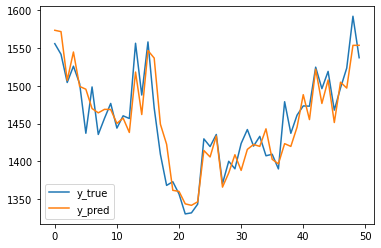

In [ ]:
y_t,y_p = get_act(model_1,test_dataset,scaler_stock,scaler_y)
plt.plot(y_t[-50:],label='y_true')
plt.plot(y_p[-50:],label='y_pred')
plt.legend()
plt.show()

## Model 2: Dense

In [ ]:
ac = 'relu'

In [ ]:
s_input = tf.keras.layers.Input(shape=(7,))
r_input = tf.keras.layers.Input(shape=(4,))

x = tf.keras.layers.Concatenate()([s_input,r_input])
x = tf.keras.layers.Dense(100,activation=ac)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(500,activation=ac)(x)
x = tf.keras.layers.Dense(0.1)(x)
x = tf.keras.layers.Dense(750,activation=ac)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(500,activation=ac)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(250,activation=ac)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(100,activation=ac)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(50,activation=ac)(x)
outputs = tf.keras.layers.Dense(1,activation=ac)(x)

model_2 = Model(tf.convert_to_tensor(scaler_stock),tf.convert_to_tensor(scaler_y),inputs={'Series': s_input,'Returns': r_input},outputs=outputs)

In [ ]:
model_2.compile(loss='mae',
                optimizer='adam')

In [ ]:
history_2 = model_2.fit(train_dataset,
                        validation_data=test_dataset,
                        epochs=25)

Epoch 1/25
72/72 [==============================] - 2s 12ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 2/25
72/72 [==============================] - 1s 9ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 3/25
72/72 [==============================] - 1s 9ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 4/25
72/72 [==============================] - 0s 7ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 5/25
72/72 [==============================] - 1s 8ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 6/25
72/72 [==============================] - 0s 5ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 7/25
72/72 [==============================] - 0s 5ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 8/25
72/72 [==============================] - 0s 5ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 9/25
72/72 [==============================] - 0s 4ms/step - loss: 91.8676 - val_loss: 487.6553
Epoch 10/25
72/72 [==============================] - 0s 5ms/step - loss: 91.8676 - val_los

In [ ]:
for i in test_dataset.take(1):
  print(model_2.predict(i[0]))
  print(i[1])

1/1 [==============================] - 0s 105ms/step
[[0.6065974 ]
 [0.6067317 ]
 [0.60652304]
 [0.6063463 ]
 [0.6073998 ]
 [0.60808986]
 [0.60760593]
 [0.60770184]
 [0.60709286]
 [0.6069749 ]
 [0.6069828 ]
 [0.6070662 ]
 [0.6075396 ]
 [0.60767215]
 [0.6079475 ]
 [0.6082358 ]
 [0.60797656]
 [0.6081847 ]
 [0.6081289 ]
 [0.60824263]
 [0.6083131 ]
 [0.6080913 ]
 [0.6083839 ]
 [0.6082234 ]
 [0.6084787 ]
 [0.6086404 ]
 [0.60876983]
 [0.60897225]
 [0.60914135]
 [0.6087706 ]
 [0.60894835]
 [0.6090731 ]]
tf.Tensor(
[[0.58439029]
 [0.69237317]
 [0.61299032]
 [0.55477445]
 [0.57869527]
 [0.64764195]
 [0.67576474]
 [0.64457509]
 [0.58331883]
 [0.62568269]
 [0.61832406]
 [0.58233393]
 [0.58758556]
 [0.59255345]
 [0.67561815]
 [0.55367051]
 [0.60754654]
 [0.598601  ]
 [0.6236739 ]
 [0.59636391]
 [0.61273957]
 [0.61670103]
 [0.63283594]
 [0.58462144]
 [0.5953475 ]
 [0.5894234 ]
 [0.60260047]
 [0.58131903]
 [0.64046161]
 [0.59632059]
 [0.57453757]
 [0.58824291]], shape=(32, 1), dtype=float64)



## Model 3: Convolutional model

In [ ]:
inp_1 = tf.keras.layers.Input(shape=(7,))
inp_2 = tf.keras.layers.Input(shape=(4,))

inps = tf.keras.layers.Reshape(target_shape=(7,1),input_shape=(7,))(inp_1)
x_0 = tf.keras.layers.Conv1D(64,2,activation=ac)(inps)
x_0 = tf.keras.layers.Conv1D(64,2,activation=ac)(x_0)
x_0 = tf.keras.layers.BatchNormalization()(x_0)
x_0 = tf.keras.layers.Conv1D(128,2,activation=ac)(x_0)
x_0 = tf.keras.layers.Conv1D(128,2,activation=ac)(x_0)
x_0 = tf.keras.layers.BatchNormalization()(x_0)
x_0 = tf.keras.layers.Conv1D(512,2,activation=ac)(x_0)
x_0 = tf.keras.layers.Conv1D(512,2,activation=ac)(x_0)
x_0 = tf.keras.layers.Flatten()(x_0)

x_1 = tf.keras.layers.Conv1D(64,3,activation=ac)(inps)
x_1 = tf.keras.layers.BatchNormalization()(x_1)
x_1 = tf.keras.layers.Conv1D(128,3,activation=ac)(x_1)
x_1 = tf.keras.layers.BatchNormalization()(x_1)
x_1 = tf.keras.layers.Conv1D(512,3,activation=ac)(x_1)
x_1 = tf.keras.layers.Flatten()(x_1)

x_2 = tf.keras.layers.Conv1D(256,4,activation=ac)(inps)
x_2 = tf.keras.layers.BatchNormalization()(x_2)
x_2 = tf.keras.layers.Conv1D(512,4,activation=ac)(x_2)
x_2 = tf.keras.layers.Flatten()(x_2)

x = tf.keras.layers.Concatenate()([x_0,x_1,x_2])
x = tf.keras.layers.Dense(700,activation=ac)(x)
x = tf.keras.layers.Dense(400,activation=ac)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(100,activation=ac)(x)
x = tf.keras.layers.Dense(25,activation=ac)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1,activation=ac)(x)

# x = tf.keras.layers.Concatenate()([x,inp_2])
r = tf.keras.layers.Dense(100,activation=ac)(inp_2)
r = tf.keras.layers.Dense(50,activation=ac)(r)
r = tf.keras.layers.Dense(4,activation=ac)(r)

f = tf.keras.layers.Concatenate()([x,r])
outputs = tf.keras.layers.Dense(1,activation='tanh')(f)

model_3_1 = tf.keras.Model(inputs={'Series': inp_1, 'Returns': inp_2},outputs=outputs)
# model_3 = Model(tf.convert_to_tensor(scaler_stock),tf.convert_to_tensor(scaler_y),inputs={'Series': inp_1, 'Returns': inp_2},outputs=outputs)

In [ ]:
model_3_1.compile(loss='mae',
                optimizer='adadelta')

In [ ]:
history_3_1 = model_3_1.fit(train_dataset,
            validation_data = test_dataset,
            epochs=100,
            callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,min_delta=0.1),
                         tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:566: UserWarning: Input dict contained keys ['Origin'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


72/72 [==============================] - 5s 17ms/step - loss: 0.6387 - val_loss: 0.6404 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 1s 12ms/step - loss: 0.6377 - val_loss: 0.6396 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 1s 12ms/step - loss: 0.6368 - val_loss: 0.6387 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 1s 12ms/step - loss: 0.6359 - val_loss: 0.6379 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 1s 12ms/step - loss: 0.6354 - val_loss: 0.6378 - lr: 1.0000e-04
Epoch 6/100
72/72 [==============================] - 1s 12ms/step - loss: 0.6353 - val_loss: 0.6378 - lr: 1.0000e-04
Epoch 7/100
72/72 [==============================] - 1s 12ms/step - loss: 0.6352 - val_loss: 0.6378 - lr: 1.0000e-04
Epoch 8/100
72/72 [==============================] - 1s 12ms/step - loss: 0.6352 - val_loss: 0.6379 - lr: 1.0000e-05
Epoch 9/100
72/72 [==============================] - 1s 11ms/step - loss: 0.6351 - val_loss:

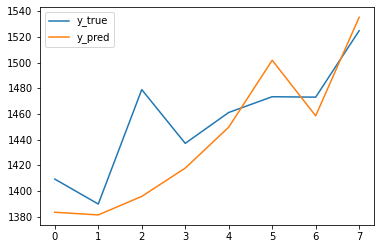

In [ ]:
y_t,y_p = get_act(model_3,test_dataset,[scaler.data_max_[:7],scaler.data_min_[:7]],[scaler.data_max_[11],scaler.data_min_[11]])
plt.plot(y_t[-15:-7],label='y_true')
plt.plot(y_p[-15:-7],label='y_pred')
plt.legend()
plt.show()

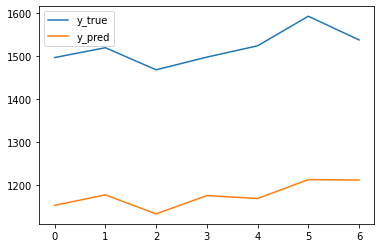

In [ ]:
# y_t,y_p = get_act(model_3_1,test_dataset,[scaler.data_max_[:7],scaler.data_min_[:7]],[scaler.data_max_[11],scaler.data_min_[11]])
plt.plot(y_t[-7:],label='y_true')
plt.plot(y_p[-7:],label='y_pred')
plt.legend()
plt.show()

## Model 4: LSTM

In [ ]:
ac = 'relu'

In [ ]:
inp_s = tf.keras.layers.Input(shape=(7,))
inp_r = tf.keras.layers.Input(shape=(4,))
# inp_t = tf.keras.layers.Input(shape=(4,))

x_0 = tf.keras.layers.Reshape(target_shape=(1,7),input_shape=(7,))(inp_s)
x_0 = tf.keras.layers.LSTM(128,return_sequences=True,activation=ac)(x_0)
x_0 = tf.keras.layers.LSTM(64,return_sequences=True,activation=ac)(x_0)
x_0 = tf.keras.layers.LSTM(32,return_sequences=True,activation=ac)(x_0)
x_0 = tf.keras.layers.LSTM(16,return_sequences=True,activation=ac)(x_0)
x_0 = tf.keras.layers.LSTM(8,return_sequences=True,activation=ac)(x_0)
x_0 = tf.keras.layers.LSTM(4,return_sequences=True,activation=ac)(x_0)
x_0 = tf.keras.layers.LSTM(2,return_sequences=True,activation=ac)(x_0)
x_0 = tf.keras.layers.LSTM(1,return_sequences=True,activation='linear')(x_0)
x_0 = tf.keras.layers.Flatten()(x_0)

x_1 = tf.keras.layers.Dense(100,activation=ac)(inp_r)
x_1 = tf.keras.layers.Dense(50,activation=ac)(x_1)
x_1 = tf.keras.layers.Dense(4,activation=ac)(x_1)

x = tf.keras.layers.Concatenate()([x_0,x_1])
x = tf.keras.layers.Dense(50,activation=ac)(x)
x = tf.keras.layers.Dense(25,activation=ac)(x)
outputs = tf.keras.layers.Dense(1,activation='tanh')(x)

model_4_1 = tf.keras.Model(inputs={'Series': inp_s,'Returns': inp_r},outputs=outputs)
# model_4_2 = Model(tf.convert_to_tensor(scaler_y),inputs={'Series':inp_s,'Returns':inp_r},outputs=outputs)

In [ ]:
model_4_1.compile(loss='mae',
                optimizer='adam')

In [ ]:
history_4_1 = model_4_1.fit(train_dataset,
            validation_data=test_dataset,
            epochs=100,
            callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,min_delta=0.01),
                       tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:566: UserWarning: Input dict contained keys ['Origin', 'Time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


72/72 [==============================] - 14s 42ms/step - loss: 0.1865 - val_loss: 0.0395 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - 2s 28ms/step - loss: 0.0374 - val_loss: 0.0354 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - 3s 39ms/step - loss: 0.0341 - val_loss: 0.0336 - lr: 0.0010
Epoch 4/100
72/72 [==============================] - 2s 27ms/step - loss: 0.0322 - val_loss: 0.0317 - lr: 0.0010
Epoch 5/100
72/72 [==============================] - 2s 29ms/step - loss: 0.0311 - val_loss: 0.0307 - lr: 1.0000e-04
Epoch 6/100
72/72 [==============================] - 2s 28ms/step - loss: 0.0311 - val_loss: 0.0307 - lr: 1.0000e-04
Epoch 7/100
72/72 [==============================] - 2s 28ms/step - loss: 0.0310 - val_loss: 0.0307 - lr: 1.0000e-04
Epoch 8/100
72/72 [==============================] - 3s 35ms/step - loss: 0.0308 - val_loss: 0.0307 - lr: 1.0000e-05
Epoch 9/100
72/72 [==============================] - 2s 29ms/step - loss: 0.0308 - val_loss

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:566: UserWarning: Input dict contained keys ['Origin', 'Time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


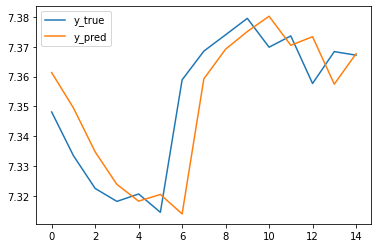

In [ ]:
y_t,y_p = get_act(model_4_1,test_dataset,[scaler.data_max_[11],scaler.data_min_[11]])
plt.plot(y_t[-15:],label='y_true')
plt.plot(y_p[-15:],label='y_pred')
plt.legend()
plt.show()

In [ ]:
history_4_1_test = model_4_1.fit(test_dataset,
              epochs=15)

Epoch 1/15
18/18 [==============================] - 1s 36ms/step - loss: 0.0311
Epoch 2/15
18/18 [==============================] - 1s 41ms/step - loss: 0.0311
Epoch 3/15
18/18 [==============================] - 1s 44ms/step - loss: 0.0311
Epoch 4/15
18/18 [==============================] - 1s 69ms/step - loss: 0.0311
Epoch 5/15
18/18 [==============================] - 0s 23ms/step - loss: 0.0311
Epoch 6/15
18/18 [==============================] - 0s 25ms/step - loss: 0.0311
Epoch 7/15
18/18 [==============================] - 0s 23ms/step - loss: 0.0311
Epoch 8/15
18/18 [==============================] - 0s 24ms/step - loss: 0.0311
Epoch 9/15
18/18 [==============================] - 0s 24ms/step - loss: 0.0311
Epoch 10/15
18/18 [==============================] - 0s 24ms/step - loss: 0.0311
Epoch 11/15
18/18 [==============================] - 0s 24ms/step - loss: 0.0311
Epoch 12/15
18/18 [==============================] - 0s 22ms/step - loss: 0.0311
Epoch 13/15
18/18 [==================

# Dataset 3: for N-Beats Algorithm

In [ ]:
!python -m pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
infy_prices = yf.download('INFY.NS',
                          start='2011-01-01',
                          end=pd.Timestamp.today())
infy_close = infy_prices['Close']
log_infy = np.log(infy_close)
log_infy = log_infy.diff(1)

In [ ]:
d_7 = pd.concat([log_infy.shift(i) for i in range(8)],axis=1)
d_15 = pd.concat([log_infy.shift(i) for i in range(16)],axis=1)
d_30 = pd.concat([log_infy.shift(i) for i in range(31)],axis=1)
d_60 = pd.concat([log_infy.shift(i) for i in range(61)],axis=1)

In [ ]:
d_7 = d_7.dropna()
d_15 = d_15.dropna()
d_30 = d_30.dropna()
d_60 = d_60.dropna()

In [ ]:
len(d_60)

2863

In [ ]:
in_t = ['t+1','t0']
c_7 = in_t + [f't-{i}' for i in range(1,7)]
c_15 = in_t + [f't-{i}' for i in range(1,15)]
c_30 = in_t + [f't-{i}' for i in range(1,30)]
c_60 = in_t + [f't-{i}' for i in range(1,60)]

In [ ]:
d_7 = d_7.loc[d_7.index >= d_60.index[0]]
d_15 = d_15.loc[d_15.index >= d_60.index[0]]
d_30 = d_30.loc[d_30.index >= d_60.index[0]]

In [ ]:
d_7.columns = c_7
d_15.columns = c_15
d_30.columns = c_30
d_60.columns = c_60

In [ ]:
d_7.head()

,t+1,t0,t-1,t-2,t-3,t-4,t-5,t-6
Date,,,,,,,,
2011-03-31,0.021959,-0.000772,0.010708,-0.007457,0.051992,0.003152,0.016947,0.007075
2011-04-01,-0.007168,0.021959,-0.000772,0.010708,-0.007457,0.051992,0.003152,0.016947
2011-04-04,0.019997,-0.007168,0.021959,-0.000772,0.010708,-0.007457,0.051992,0.003152
2011-04-05,0.000030,0.019997,-0.007168,0.021959,-0.000772,0.010708,-0.007457,0.051992
2011-04-06,-0.002470,0.000030,0.019997,-0.007168,0.021959,-0.000772,0.010708,-0.007457


In [ ]:
latest_d_7 = d_7.reindex(columns=d_7.columns[::-1])[-1:].drop('t-6',axis=1)
latest_d_15 = d_15.reindex(columns=d_15.columns[::-1])[-1:].drop('t-14',axis=1)
latest_d_30 = d_30.reindex(columns=d_30.columns[::-1])[-1:].drop('t-29',axis=1)
latest_d_60 = d_60.reindex(columns=d_60.columns[::-1])[-1:].drop('t-59',axis=1)

In [ ]:
y = d_7.pop('t+1')
d_15 = d_15.drop(['t+1'],axis=1)
d_30 = d_30.drop(['t+1'],axis=1)
d_60 = d_60.drop(['t+1'],axis=1)

In [ ]:
d_7 = d_7.reindex(columns=list(reversed(list(d_7.columns))))
d_15 = d_15.reindex(columns=list(reversed(list(d_15.columns))))
d_30 = d_30.reindex(columns=list(reversed(list(d_30.columns))))
d_60 = d_60.reindex(columns=list(reversed(list(d_60.columns))))

In [ ]:
train_len = int(0.8*len(y))

In [ ]:
y_train = tf.data.Dataset.from_tensor_slices(y[:2290].to_numpy())
y_test = tf.data.Dataset.from_tensor_slices(y[2290:].to_numpy())

x_train = tf.data.Dataset.from_tensor_slices({'d_7': d_7[:train_len].to_numpy(),
                                              'd_15': d_15[:train_len].to_numpy(),
                                              'd_30': d_30[:train_len].to_numpy(),
                                              'd_60': d_60[:train_len].to_numpy()})
x_test = tf.data.Dataset.from_tensor_slices({'d_7': d_7[train_len:].to_numpy(),
                                             'd_15': d_15[train_len:].to_numpy(),
                                             'd_30': d_30[train_len:].to_numpy(),
                                             'd_60': d_60[train_len:].to_numpy()})

train_dataset = tf.data.Dataset.zip((x_train,y_train))
test_dataset = tf.data.Dataset.zip((x_test,y_test))

In [ ]:
for i in y_test.take(1):
  print(i)

tf.Tensor(0.016277356847815838, shape=(), dtype=float64)


In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for i in train_dataset:
  print(i[0]['d_15'][0])
  break

tf.Tensor(
[-0.00169745 -0.01183256  0.01524073 -0.02304807  0.00024748 -0.01737263
 -0.01270325 -0.0064127   0.00707548  0.01694672  0.00315201  0.05199156
 -0.00745727  0.01070835 -0.00077241], shape=(15,), dtype=float64)


## Model 1

In [ ]:
# Create custom N-Beats layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(self.n_neurons,activation='relu') for _ in range(self.n_layers)]

    self.theta_layer = tf.keras.layers.Dense(self.theta_size,activation='linear')

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)

    theta = self.theta_layer(x)

    backcast, forecast = theta[...,:self.input_size],theta[...,-self.horizon:]

    return backcast,forecast




In [ ]:
def stack(s_inputs,n_blocks,**kwargs):
  x = s_inputs
  fcs = []
  for j in range(n_blocks):
    bc,fc = NBeatsBlock(**kwargs)(x)
    x = tf.keras.layers.subtract([x,bc])

    fcs.append(fc)

  b_o = tf.keras.layers.add(fcs)

  return x,b_o


def make_stacks(inputs,n_stacks,**kwargs):
  x = inputs
  forecast_layers = []

  for i in range(n_stacks):
    backcast,forecast = stack(s_inputs=x,**kwargs)
    x = backcast
    forecast_layers.append(forecast)

  op = tf.keras.layers.add(forecast_layers)

  outputs = tf.keras.layers.Flatten()(op)
  return outputs



In [ ]:
n_stacks = 10
n_blocks = 5
N_NEURONS = 512
N_LAYERS = 4

In [ ]:
# We will make windows of 7, 15, 30, 60 and horizon of 1
inp_7 = tf.keras.layers.Input(shape=(7,))
inp_15 = tf.keras.layers.Input(shape=(15,))
inp_30 = tf.keras.layers.Input(shape=(30,))
inp_60 = tf.keras.layers.Input(shape=(60,))

N_mod_7 = make_stacks(inputs=inp_7,n_stacks=n_stacks,n_blocks=n_blocks,
                      input_size=7,theta_size=8,
                      horizon=1,n_neurons=N_NEURONS,
                      n_layers=N_LAYERS)
N_mod_15 = make_stacks(inputs=inp_15,n_stacks=n_stacks,n_blocks=n_blocks,
                       input_size=15,theta_size=16,
                       horizon=1,n_neurons=N_NEURONS,
                       n_layers=N_LAYERS)
N_mod_30 = make_stacks(inputs=inp_30,n_stacks=n_stacks,n_blocks=n_blocks,
                       input_size=30,theta_size=31,
                       horizon=1,n_neurons=N_NEURONS,
                       n_layers=N_LAYERS)
N_mod_60 = make_stacks(inputs=inp_60,n_stacks=n_stacks,n_blocks=n_blocks,
                       input_size=60,theta_size=61,
                       horizon=1,n_neurons=N_NEURONS,
                       n_layers=N_LAYERS)

f_out = tf.keras.layers.Average()([N_mod_7,N_mod_15,N_mod_30,N_mod_60])

model_1 = tf.keras.Model(inputs={'d_7':inp_7,'d_15':inp_15,'d_30': inp_30,'d_60':inp_60},outputs=f_out)

In [ ]:
model_1.compile(loss='mae',
                optimizer='adam')

In [ ]:
history_1 = model_1.fit(train_dataset,
            validation_data=test_dataset,
            epochs=15)

Epoch 1/15
72/72 [==============================] - 75s 301ms/step - loss: 0.7777 - val_loss: 0.0243
Epoch 2/15
72/72 [==============================] - 14s 190ms/step - loss: 0.0357 - val_loss: 0.0653
Epoch 3/15
72/72 [==============================] - 13s 175ms/step - loss: 0.0223 - val_loss: 0.0121
Epoch 4/15
72/72 [==============================] - 13s 174ms/step - loss: 0.0220 - val_loss: 0.0310
Epoch 5/15
72/72 [==============================] - 13s 176ms/step - loss: 0.0220 - val_loss: 0.0195
Epoch 6/15
72/72 [==============================] - 13s 174ms/step - loss: 0.0322 - val_loss: 0.0236
Epoch 7/15
72/72 [==============================] - 13s 183ms/step - loss: 0.0192 - val_loss: 0.0130
Epoch 8/15
72/72 [==============================] - 12s 173ms/step - loss: 0.0148 - val_loss: 0.0128
Epoch 9/15
72/72 [==============================] - 13s 174ms/step - loss: 0.0170 - val_loss: 0.0141
Epoch 10/15
72/72 [==============================] - 13s 175ms/step - loss: 0.0143 - val_lo

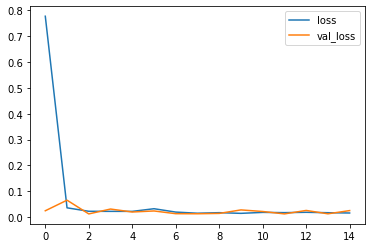

In [ ]:
pd.DataFrame(history_1.history).plot()

In [ ]:
y

Date
2011-03-31    0.021959
2011-04-01   -0.007168
2011-04-04    0.019997
2011-04-05    0.000030
2011-04-06   -0.002470
                ...   
2022-11-17   -0.009655
2022-11-18    0.003773
2022-11-21   -0.015942
2022-11-22    0.010688
2022-11-23   -0.001199
Name: t+1, Length: 2871, dtype: float64

In [ ]:
lg_infy = np.log(infy_close)

In [ ]:
lg_infy = lg_infy[60:]

In [ ]:
test_lg_infy = lg_infy[train_len:]

In [ ]:
n = 1
print(test_lg_infy[n] - test_lg_infy[n-1])

-0.009464915913597771


In [ ]:
s = 0
for i in test_dataset:
  s += len(i[1])

In [ ]:
x_test = test_dataset.unbatch()

In [ ]:
x_test = x_test.batch(s)

In [ ]:
for i in x_test:
  x = i[0]
  y = i[1]
  y_pred = model_1(x,training=False)

In [ ]:
len(y)

575

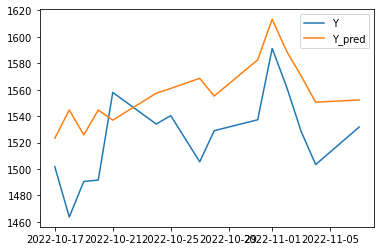

In [ ]:
n = 550
m = 15
plt.plot(np.e**(test_lg_infy[:-1] + y)[n:n+m],label='Y')
plt.plot(np.e**(test_lg_infy[:-1] + tf.squeeze(y_pred))[n:n+m],label='Y_pred')
plt.legend()
plt.show()

In [ ]:
np.e**(test_lg_infy + tf.squeeze(y_pred))[-1]

3054073.4313080795

In [ ]:
x_test = x_test.batch(1)

In [ ]:
y_preds = []
ys = []
for i,j in zip(x_test,test_lg_infy):
  x = i[0]
  y = i[1]
  y_pred = model_1(x,training=False)

  ys.append(j+y)
  y_preds.append(j+y_pred)


KeyboardInterrupt: ignored

In [ ]:
latest_data = {'d_7':latest_d_7.to_numpy(),
               'd_15': latest_d_15.to_numpy(),
               'd_30': latest_d_30.to_numpy(),
               'd_60': latest_d_60.to_numpy()}

model_1(latest_data)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.0051174]], dtype=float32)>

In [ ]:
np.e**(test_lg_infy[-2]+0.0051174)

1611.023240533024

# Dataset 4: Making Predictions on daily percentage returns

In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
infy_prices = yf.download('INFY.NS',start='2011-01-01',end=pd.Timestamp.today())
# infy_close = infy_prices['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
infy_final = infy_prices[['Close']].diff(1)/infy_prices[['Close']].shift(1)*100

In [ ]:
infy_final = infy_final[1:]

In [ ]:
dataset_x = []
dataset_y = []
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=8)
for i in infy_final.rolling(window=indexer,min_periods=8):
  if len(i) == 8:
    dataset_x.append(i.values[:7])
    dataset_y.append(i.values[7])
  else:
    pass



In [ ]:
train_x, train_y = dataset_x[:2373], dataset_y[:2373]
test_x, test_y = dataset_x[2373:], dataset_y[2373:]

In [ ]:
dataset_x[0].shape

(7, 1)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x,train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_x,test_y))

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Simple Moving Average

In [ ]:
# infy_t['SMA_5'] = infy_prices['Close'].transform(lambda x: x.rolling(window=5).mean())
infy_t['SMA_15'] = infy_prices['Close'].transform(lambda x: x.rolling(window=15).mean())

infy_final['SMA_15'] = infy_t['SMA_15']

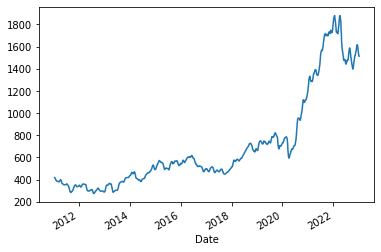

In [ ]:
(infy_final['SMA_15']).plot()

## Simple Average Volume

In [ ]:
infy_t['SMA15_VOL'] = infy_prices['Volume'].transform(lambda x: x.rolling(window=15).mean())
# infy_t['SMA5_VOL'] = infy_prices['Volume'].transform(lambda x: x.rolling(window=5).mean())

infy_final['SMA15_VOL'] = infy_t['SMA15_VOL']

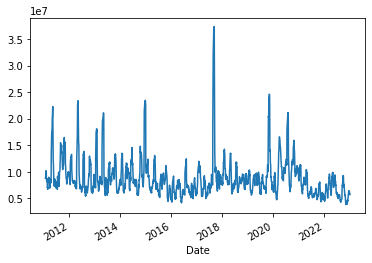

In [ ]:
infy_final['SMA15_VOL'].plot()

## Wilder's Smoothening

In [ ]:
def Wilder(data,periods):
  start = np.where(~np.isnan(data))[0][0]

  wilder = np.array([np.nan] * len(data))
  wilder[start+periods - 1] = data[start:(start+periods)].mean()
  for i in range(start+periods,len(data)):
    wilder[i] = (wilder[i-1]*(periods-1) + data[i]) / periods

  return (wilder)

## Average True Range

In [ ]:
infy_t['Prev_Close'] = infy_prices['Close'].shift(1)
infy_t['TR'] = np.maximum((infy_prices['High'] - infy_prices['Low']),
                              np.maximum((abs(infy_prices['High'] - infy_t['Prev_Close'])),
                              (abs(infy_t['Prev_Close'] - infy_prices['Low']))))

infy_t['ATR_15'] = Wilder(infy_t['TR'],15)

infy_final['ATR_15'] = infy_t['ATR_15']

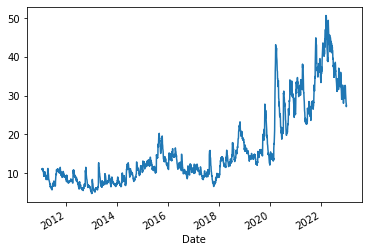

In [ ]:
infy_final['ATR_15'].plot()

## Stochastic Oscillaltors

In [ ]:
# infy_t['Lowest_5D'] = infy_prices['Low'].transform(lambda x: x.rolling(window=5).min())
# infy_t['Highest_5D'] = infy_prices['High'].transform(lambda x: x.rolling(window=5).max())
infy_t['Lowest_15D'] = infy_prices['Low'].transform(lambda x: x.rolling(window=15).min())
infy_t['Highest_15D'] = infy_prices['High'].transform(lambda x: x.rolling(window=15).max())

# infy_t['Stochastic_5D'] = ((infy_prices['Close'] - infy_t['Lowest_5D']) / (infy_t['Highest_5D'] - infy_t['Lowest_5D'])) * 100
infy_t['Stochastic_15D'] = ((infy_prices['Close'] - infy_t['Lowest_15D']) / (infy_t['Highest_15D'] - infy_t['Lowest_15D']))

# infy_t['ST_5D_mean'] = infy_t['Stochastic_5D'].rolling(window=5).mean()
infy_final['ST_15D_mean'] = infy_t['Stochastic_15D'].rolling(window=15).mean()

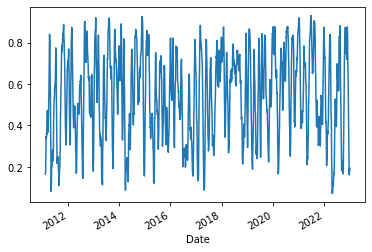

In [ ]:
infy_final['ST_15D_mean'].plot()

## Relative Strength Index

In [ ]:
infy_t['Diff'] = infy_prices['Close'].transform(lambda x: x.diff())
infy_t['Up'] = infy_t['Diff']
infy_t.loc[(infy_t['Up']<0),'Up'] = 0

infy_t['Down'] = infy_t['Diff']
infy_t.loc[(infy_t['Down']>0),'Down'] = 0
infy_t['Down'] = abs(infy_t['Down'])

infy_t['avg_5up'] = infy_t['Up'].transform(lambda x: x.rolling(window=5).mean())
infy_t['avg_5dwn'] = infy_t['Down'].transform(lambda x: x.rolling(window=5).mean())

infy_t['avg_15up'] = infy_t['Up'].transform(lambda x: x.rolling(window=15).mean())
infy_t['avg_15dwn'] = infy_t['Down'].transform(lambda x: x.rolling(window=15).mean())

infy_t['RS_5'] = infy_t['avg_5up'] / infy_t['avg_5dwn']
infy_t['RS_15'] = infy_t['avg_15up'] / infy_t['avg_15dwn']

infy_t['RSI_5'] = 1 - (1/(1+infy_t['RS_5']))
infy_t['RSI_15'] = 1 - (1/(1+infy_t['RS_15']))

infy_final['RSI_ratio'] = infy_t['RSI_5'] / infy_t['RSI_15']

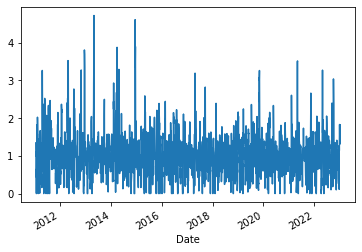

In [ ]:
infy_final['RSI_ratio'].plot()

## MACD

In [ ]:
infy_t['5Ewm'] = infy_prices['Close'].transform(lambda x: x.ewm(span=5,adjust=False).mean())
infy_t['15Ewm'] = infy_prices['Close'].transform(lambda x: x.ewm(span=15,adjust=False).mean())
infy_final['MACD'] = infy_t['15Ewm'] - infy_t['5Ewm']
# infy_final['MACD'] /= 100

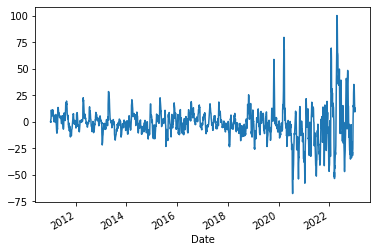

In [ ]:
(infy_final['MACD']).plot()

In [ ]:
infy_final.head()

,Close,SMA_15,SMA15_VOL,ATR_15,ST_15D_mean,RSI_ratio,MACD
Date,,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2011-01-04,0.667944,NaN,NaN,NaN,NaN,NaN,-0.601559
2011-01-05,-0.627608,NaN,NaN,NaN,NaN,NaN,-0.358396
2011-01-06,0.536183,NaN,NaN,NaN,NaN,NaN,-0.684686
2011-01-07,-3.087846,NaN,NaN,NaN,NaN,NaN,1.950379


In [ ]:
infy_final = infy_final.dropna()

In [ ]:
len(infy_final)

2934

In [ ]:
infy_final['Close'] = infy_final['Close'].shift(-1)

<ipython-input-25-0409a9fb00c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infy_final['Close'] = infy_final['Close'].shift(-1)


In [ ]:
infy_last = infy_final.iloc[-1]

In [ ]:
infy_final.head()

,Close,SMA_15,SMA15_VOL,ATR_15,ST_15D_mean,RSI_ratio,MACD
Date,,,,,,,
2011-02-11,2.094807,391.863747,8.534645e+06,10.332820,0.165509,1.763889,7.607989
2011-02-14,0.064422,390.702913,8.691460e+06,10.292299,0.172745,1.437850,5.845293
2011-02-15,-0.114276,389.218748,8.498033e+06,10.063230,0.171787,1.582266,4.521417
2011-02-16,0.333551,387.913332,8.030998e+06,9.747347,0.177893,1.191572,3.653212
2011-02-17,-0.419164,387.217084,7.409820e+06,9.312524,0.200314,2.023200,2.725008


In [ ]:
infy_final.corr()

,Close,SMA_15,SMA15_VOL,ATR_15,ST_15D_mean,RSI_ratio,MACD
Close,1.000000,-0.007191,0.019839,0.004064,-0.019969,0.004003,0.015879
SMA_15,-0.007191,1.000000,-0.265063,0.910039,0.063525,-0.026765,-0.086229
SMA15_VOL,0.019839,-0.265063,1.000000,-0.078163,-0.145735,0.127127,0.087508
ATR_15,0.004064,0.910039,-0.078163,1.000000,-0.019850,-0.003426,0.003038
ST_15D_mean,-0.019969,0.063525,-0.145735,-0.019850,1.000000,-0.336469,-0.616085
RSI_ratio,0.004003,-0.026765,0.127127,-0.003426,-0.336469,1.000000,-0.001980
MACD,0.015879,-0.086229,0.087508,0.003038,-0.616085,-0.001980,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
target = infy_final["Close"]
# infy_final.drop('SMA15_VOL')
featrues = infy_final[['SMA_15','ATR_15','ST_15D_mean','RSI_ratio']]

In [ ]:
train_target = target[:2500]
test_target = target[2500:]
train_features = featrues[:2500]
test_feutures = featrues[2500:]

In [ ]:
traom/

In [ ]:
model.fit(train_features,train_target)

LinearRegression()

In [ ]:
test_feautures.max()

SMA_15         1.880713e+03
SMA15_VOL      1.043036e+07
ATR_15         5.067703e+01
ST_15D_mean    9.305907e-01
RSI_ratio      3.516179e+00
MACD           1.001390e+02
dtype: float64

##Model 1: N-BEATS ALGO

In [ ]:
n_stacks = 10
n_blocks = 5
N_NEURONS = 512
N_LAYERS = 4

In [ ]:
N_mod_7 = make_stacks(inputs=inp_7,n_stacks=n_stacks,n_blocks=n_blocks,
                      input_size=7,theta_size=8,
                                            horizon=1,n_neurons=N_NEURONS,
                                                                  n_layers=N_LAYERS)

NameError: ignored

In [ ]:
inputs = tf.keras.layers.Input(shape=(7,))
body = make_stacks(inputs=inputs,n_stacks=n_stacks,n_blocks=n_blocks,
                   input_size=7,theta_size=8,horizon=1,
                   n_neurons=N_NEURONS,
                   n_layers=N_LAYERS)

model_1 = tf.keras.Model(inputs=inputs,outputs=body)

In [ ]:
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

In [ ]:
history_1 = model_1.fit(train_dataset,
                        epochs=7,
                        validation_data=test_dataset,
                        shuffle=False)

Epoch 1/7
75/75 [==============================] - 31s 68ms/step - loss: 155.6594 - mae: 3.4894 - val_loss: 3.4188 - val_mae: 1.4100
Epoch 2/7
75/75 [==============================] - 3s 41ms/step - loss: 3.4713 - mae: 1.2347 - val_loss: 2.6433 - val_mae: 1.2399
Epoch 3/7
75/75 [==============================] - 3s 42ms/step - loss: 3.3012 - mae: 1.2145 - val_loss: 2.8114 - val_mae: 1.2763
Epoch 4/7
75/75 [==============================] - 3s 41ms/step - loss: 3.2431 - mae: 1.2092 - val_loss: 2.8243 - val_mae: 1.2780
Epoch 5/7
75/75 [==============================] - 3s 41ms/step - loss: 3.1711 - mae: 1.1998 - val_loss: 2.7262 - val_mae: 1.2586
Epoch 6/7
75/75 [==============================] - 3s 42ms/step - loss: 3.1029 - mae: 1.1897 - val_loss: 2.7178 - val_mae: 1.2598
Epoch 7/7
75/75 [==============================] - 3s 41ms/step - loss: 3.0399 - mae: 1.1802 - val_loss: 2.7190 - val_mae: 1.2606


In [ ]:
y_pred = []
y_true = []
for i,j in test_dataset:
  y_pred.append(model_1(i))
  y_true.append(j)

In [ ]:
y_pred_f = tf.squeeze(tf.concat(y_pred,axis=0))
y_true_f = tf.squeeze(tf.concat(y_true,axis=0))

594

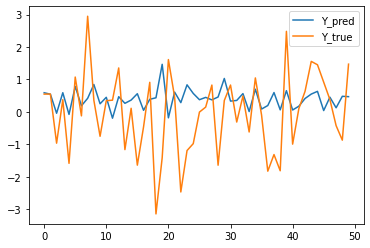

In [ ]:
plt.plot(y_pred_f[-50:],label='Y_pred')
plt.plot(y_true_f[-50:],label='Y_true')
plt.legend()
plt.show()